In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
%matplotlib inline

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data.head(7)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [4]:
data.duplicated().value_counts()

False    10000
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
data.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [7]:
LE = LabelEncoder()
data['country'] = LE.fit_transform(data['country'])
data.country.value_counts()

0    5014
1    2509
2    2477
Name: country, dtype: int64

In [6]:
data.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [8]:
data['gender'] = LE.fit_transform(data['gender'])
data.gender.value_counts()

1    5457
0    4543
Name: gender, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int32  
 3   gender            10000 non-null  int32  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int32(2), int64(8)
memory usage: 859.5 KB


In [152]:
data['country'] = pd.to_numeric(data['country'])
data['gender'] = pd.to_numeric(data['gender'])
data.dtypes

customer_id           int64
credit_score          int64
country               int32
gender                int32
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [10]:
data.describe()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
data2 = data.drop(columns='customer_id', axis = 1)
data2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [155]:
data2

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [156]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int32  
 2   gender            10000 non-null  int32  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


<AxesSubplot: xlabel='estimated_salary'>

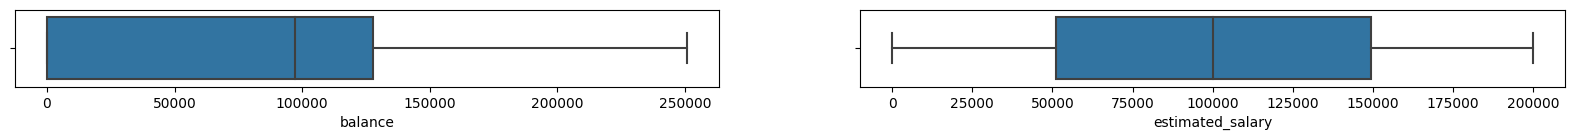

In [23]:
fig, axList = plt.subplots(nrows=1, ncols=2) 
axList = axList.flatten()                      
fig.set_size_inches(20,1)
sns.boxplot(x = data2['balance'], ax= axList[0])
sns.boxplot(x = data2['estimated_salary'], ax= axList[1])

In [123]:
data2 = data2.loc[data2['balance'] > 0 ]
data2['balance'].value_counts()

105473.74    2
130170.82    2
83807.86     1
85304.27     1
159397.75    1
            ..
81556.89     1
112687.69    1
108698.96    1
238387.56    1
130142.79    1
Name: balance, Length: 6381, dtype: int64

<AxesSubplot: xlabel='estimated_salary'>

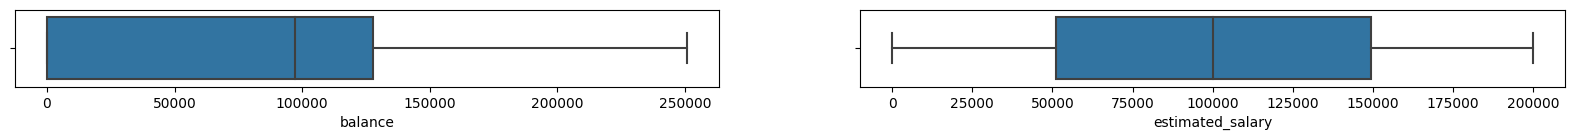

In [158]:
fig, axList = plt.subplots(nrows=1, ncols=2) 
axList = axList.flatten()                      
fig.set_size_inches(20,1)
sns.boxplot(x = data2['balance'], ax= axList[0])
sns.boxplot(x = data2['estimated_salary'], ax= axList[1])

In [25]:
feature_cols = data2.columns[:-1]
feature_cols

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

c:\Python311\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


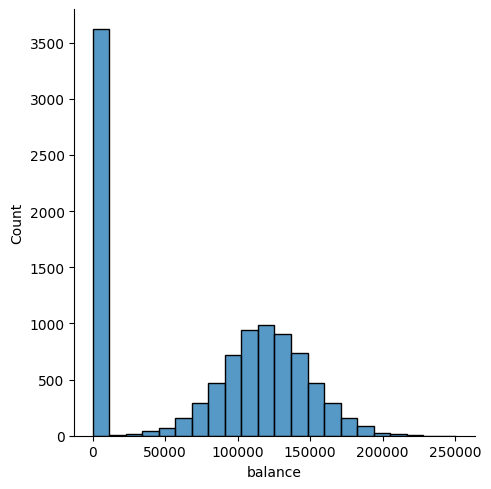

In [160]:
sns.displot(x = data2['balance'], ax= axList[0])

In [26]:
X_train,X_test,y_train,y_test = train_test_split(data2[feature_cols],data2['churn'], test_size= 0.2)

In [27]:
X_train = StandardScaler().fit_transform(X_train)
X_test =StandardScaler().fit_transform(X_test)

In [28]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

DTC = DecisionTreeClassifier(criterion='entropy', max_features= 3 , max_depth=2 )
DTC.fit(X_train, y_train)
y_pred2 = DTC.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=20)
KNN.fit(X_train, y_train)
y_pred3 = KNN.predict(X_test)

RC = RandomForestClassifier(n_estimators=400)
RC.fit(X_train, y_train)
y_pred4 = RC.predict(X_test)

GBC = GradientBoostingClassifier(learning_rate=0.1, max_features=4, subsample= 0.5, n_estimators= 200)
GBC.fit(X_train, y_train)
y_pred5 = GBC.predict(X_test)



In [29]:
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1_score:', f1_score(y_test, y_pred))

Accuracy score: 0.817
F1_score: 0.27380952380952384


In [30]:
print('Accuracy score:', accuracy_score(y_test, y_pred2))
print('F1_score:', f1_score(y_test, y_pred2))

Accuracy score: 0.8335
F1_score: 0.2309468822170901


In [31]:
print('Accuracy score:', accuracy_score(y_test, y_pred3))
print('F1_score:', f1_score(y_test, y_pred3))

Accuracy score: 0.8515
F1_score: 0.40954274353876746


In [32]:
print('Accuracy score:', accuracy_score(y_test, y_pred4))
print('F1_score:', f1_score(y_test, y_pred4))

Accuracy score: 0.8785
F1_score: 0.608695652173913


In [33]:
print('Accuracy score:', accuracy_score(y_test, y_pred5))
print('F1_score:', f1_score(y_test, y_pred5))

Accuracy score: 0.8815
F1_score: 0.6183574879227053


In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
conf_matrix4 = confusion_matrix(y_test, y_pred4)
conf_matrix5 = confusion_matrix(y_test, y_pred5)

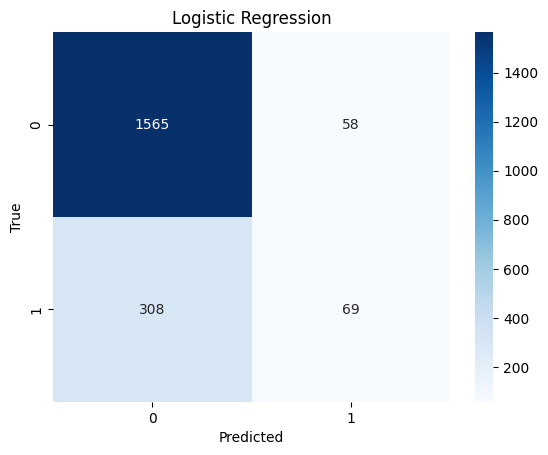

In [35]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

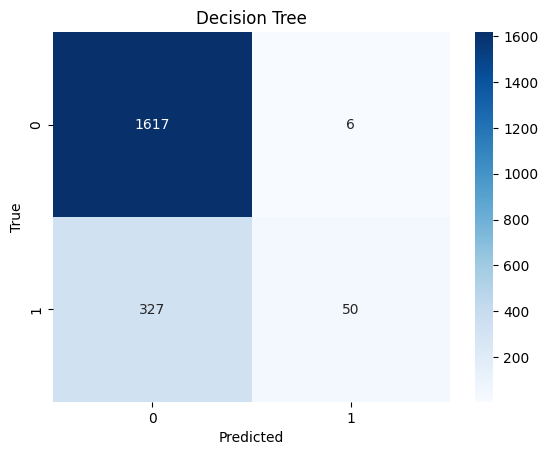

In [36]:
sns.heatmap(conf_matrix2, annot=True, cmap='Blues', fmt='g')
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

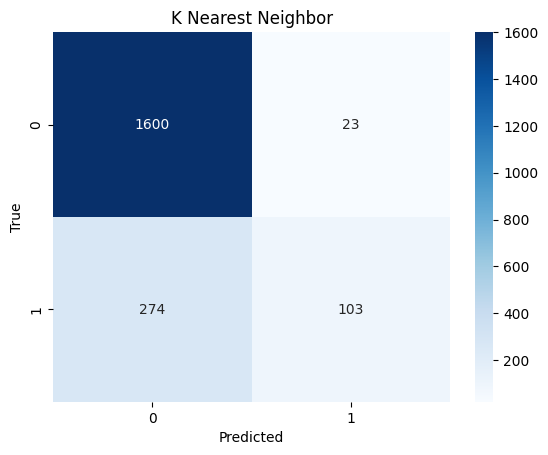

In [43]:
sns.heatmap(conf_matrix3, annot=True, cmap='Blues', fmt='g')
plt.title('K Nearest Neighbor')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

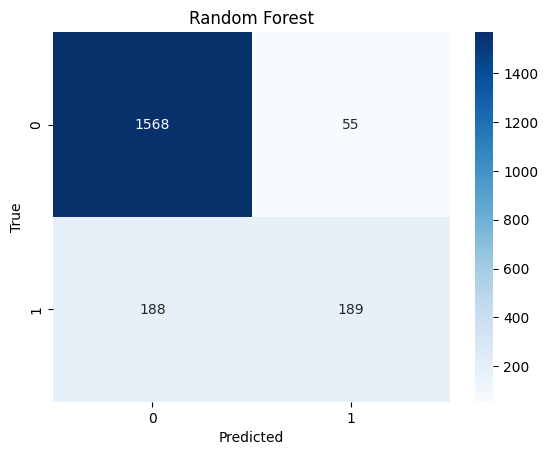

In [44]:
sns.heatmap(conf_matrix4, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

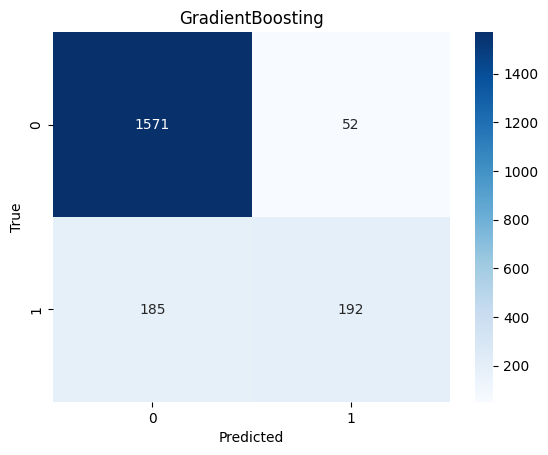

In [45]:
sns.heatmap(conf_matrix5, annot=True, cmap='Blues', fmt='g')
plt.title('GradientBoosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()